### PROJECT : CUSTOMER SEGMENTATION BY USING K-MEANS CLUSTERING ALGORITHM

Using K-Means Clustering, this project segments retail store customers based on their purchase history, enabling targeted marketing strategies for improved customer engagement and satisfaction.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')  

### Loading the Dataset

In [2]:
df=pd.read_csv('mall_customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### Basic information of dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [19]:
df.shape

(200, 6)

### Statistical information of dataset

In [20]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),output
count,200.000000,200.000000,200.000000,200.000000,200.00000
mean,100.500000,38.850000,60.560000,50.200000,2.03000
std,57.879185,13.969007,26.264721,25.823522,1.12937
min,1.000000,18.000000,15.000000,1.000000,0.00000
25%,50.750000,28.750000,41.500000,34.750000,1.00000
50%,100.500000,36.000000,61.500000,50.000000,2.00000
75%,150.250000,49.000000,78.000000,73.000000,3.00000
max,200.000000,70.000000,137.000000,99.000000,4.00000


In [21]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),output
CustomerID,1.000000,-0.026763,0.977548,0.013835,0.000308
Age,-0.026763,1.000000,-0.012398,-0.327227,0.181847
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903,0.000447
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000,-0.039147
output,0.000308,0.181847,0.000447,-0.039147,1.000000


### Univariate and Bivariate Analysis

The histogram reveals the distribution of spending scores among customers.


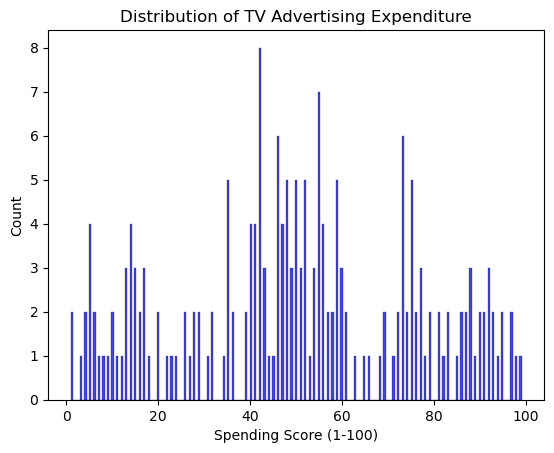

In [45]:
plt.subplot(1, 1, 1)
sns.histplot(df['Spending Score (1-100)'], bins=199, color='blue')
plt.title('Distribution of TV Advertising Expenditure')

print('The histogram reveals the distribution of spending scores among customers.')

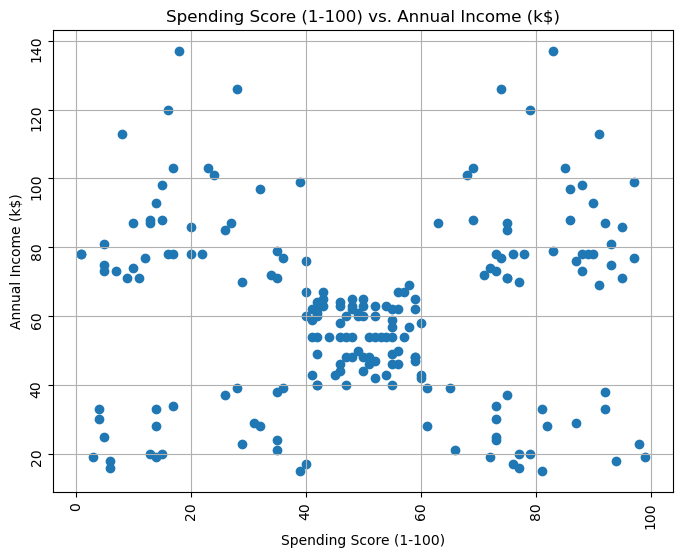

The scatter plot illustrates the relationship between spending score and annual income among customers. Here, Annual income correlates positively with spending score, indicating that customers with higher incomes tend to have higher spending scores.


In [46]:
plt.figure(figsize=(8, 6))
plt.scatter(x=df['Spending Score (1-100)'], y=df['Annual Income (k$)'])
plt.title('Spending Score (1-100) vs. Annual Income (k$)')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.xticks(rotation=90)
plt.yticks(rotation=90)
plt.grid()
plt.show()

print('The scatter plot illustrates the relationship between spending score and annual income among customers. Here, Annual income correlates positively with spending score, indicating that customers with higher incomes tend to have higher spending scores.')

### Features of data

In [5]:
x=df.iloc[:,[3,4]]

In [6]:
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


### Using K-Means Clustering Algorithm

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [8]:
wcss=[]
sil_score={}
for i in range(2,31):
    km=KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300,random_state=1)
    km.fit(x)
    wcss.append(km.inertia_)
    sil_score[i]=silhouette_score(x,km.labels_)

In [9]:
wcss

[181363.59595959593,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37233.81451071001,
 30566.45113025186,
 25005.55037243283,
 21996.523372372307,
 19746.911957660894,
 17602.19046838677,
 15926.627039985106,
 14631.802353268315,
 12793.951692914929,
 12002.023047743332,
 11151.50775058275,
 10264.83744776454,
 9490.19002831011,
 8880.551059466849,
 8121.5007317801665,
 7667.180982236154,
 7385.859950013754,
 7018.027058579536,
 6472.516894934568,
 6232.733574758574,
 5756.705148119854,
 5413.182221401787,
 5208.137817737817,
 4989.701612276613,
 4797.261291486292]

In [10]:
sil_score

{2: 0.2968969162503008,
 3: 0.46761358158775435,
 4: 0.4931963109249047,
 5: 0.553931997444648,
 6: 0.53976103063432,
 7: 0.5321706886465517,
 8: 0.4551677607101082,
 9: 0.45310062629634446,
 10: 0.4499261454462227,
 11: 0.437841976811071,
 12: 0.4386071394328943,
 13: 0.4524549850289858,
 14: 0.42171806687463326,
 15: 0.41222811817723953,
 16: 0.429087021596755,
 17: 0.40315775571413903,
 18: 0.4228189724059163,
 19: 0.41577217720188464,
 20: 0.4316915189885506,
 21: 0.42120160009519103,
 22: 0.41371955293515034,
 23: 0.40909705857729195,
 24: 0.4111590798314251,
 25: 0.414003801095441,
 26: 0.42235569719534993,
 27: 0.42754942193311535,
 28: 0.41437991388555045,
 29: 0.41249932229964287,
 30: 0.4235681955512392}

In [11]:
km1=KMeans(n_clusters=5,init='k-means++',n_init=10,max_iter=300,random_state=1)
labels=km1.fit_predict(x)

In [12]:
labels

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 2,
       4, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 2, 3, 1, 3, 1, 3,
       2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

In [13]:
df['output']=labels

In [14]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),output
0,1,Male,19,15,39,4
1,2,Male,21,15,81,0
2,3,Female,20,16,6,4
3,4,Female,23,16,77,0
4,5,Female,31,17,40,4


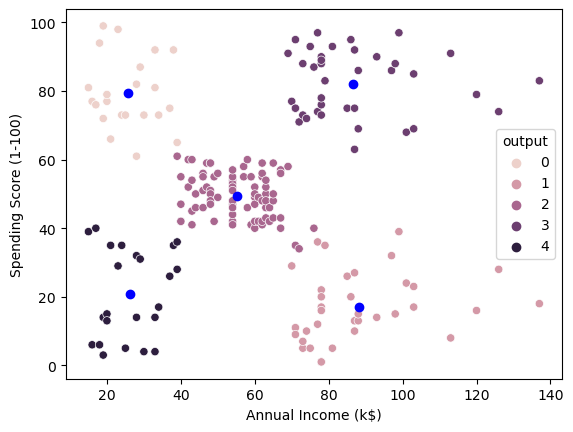

In [18]:
sns.scatterplot(data=df,x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],hue=df['output'])
plt.scatter(centroid_df['x'],centroid_df['y'],color='blue')
plt.show()

### CONCLUSION

The K-means clustering algorithm effectively segments retail store customers based on their purchase history. The insights gained from these clusters can inform targeted marketing strategies, enhancing customer engagement and satisfaction. However, further validation and refinement may be necessary to optimize clustering performance and maximize business impact.